## Student Performance Indicator


#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### Problem statement
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.


### Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

### Import Data and Required Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # allow multiple outputs in a cell


#### Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('data/stud.csv')

#### Shape and the Top 5 Records

In [3]:
df.shape
df.head()

(1000, 8)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Dataset information

- gender : sex of students  -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced) 
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

### 1. Data Checks to perform

1. Check Missing values
2. Check Duplicates
3. Check data type
4. Check the number of unique values of each column
5. Check statistics of data set
6. Check various categories present in the different categorical column

### 1.1 Check Missing values

In [4]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There are no missing values in the data set

### 1.2 Check Duplicates

In [5]:
df.duplicated().sum()

0

There are no duplicates  values in the data set

### 1.3 Check data types

In [6]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 1.4 Checking the number of unique values of each column

In [7]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### 1.5 Check statistics of data set

In [8]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Insight
- From above description of numerical data, all means are very close to each other - between 66 and 68.05;
- All standard deviations are also close - between 14.6 and 15.19;
- While there is a minimum score 0 for math, for writing and reading the minimum is 10 and 17 respectively. 

### 1.7 Exploring Data

In [9]:
# define numerical & categorical columns
num_features = [f for f in df.columns if df[f].dtype != 'O']
cat_features = [f for f in df.columns if df[f].dtype == 'O']

# print columns
print('{} numerical features : {}'.format(len(num_features), num_features))
print('\n{} categorical features : {}'.format(len(cat_features), cat_features))

3 numerical features : ['math_score', 'reading_score', 'writing_score']

5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [10]:
pd.DataFrame(df[cat_features].apply(lambda x: x.unique()),columns=['unique_val'])

,unique_val
gender,"[female, male]"
race_ethnicity,"[group B, group C, group A, group D, group E]"
parental_level_of_education,"[bachelor's degree, some college, master's deg..."
lunch,"[standard, free/reduced]"
test_preparation_course,"[none, completed]"


### 1.8 Adding columns for "Total Score" and "Average"

In [11]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [12]:
print('# of students with full score')
[(i,df[df[i] == 100].shape[0]) for i in num_features]


# of students with full score


[('math_score', 7), ('reading_score', 17), ('writing_score', 14)]

In [13]:
print('# of students with fail score')
[(i,df[df[i] < 50].shape[0]) for i in num_features]

# of students with fail score


[('math_score', 135), ('reading_score', 90), ('writing_score', 114)]

#####  Insights
 - From above values we get students have performed the worst in math followed by writing. 
 - Best performance is in reading section

### 2. Visualization 
#### 2.1 Visualize histogram and KDE 

In [88]:
def plot_hist(col, hue):
    fig, axs = plt.subplots(1, 2, figsize=(16, 6))
    plt.subplot(121)
    sns.histplot(data=df, x=col, kde=True, color='g')
    plt.subplot(122)
    sns.histplot(data=df, x=col, kde=True, hue=hue)
    plt.show();
    

##### average

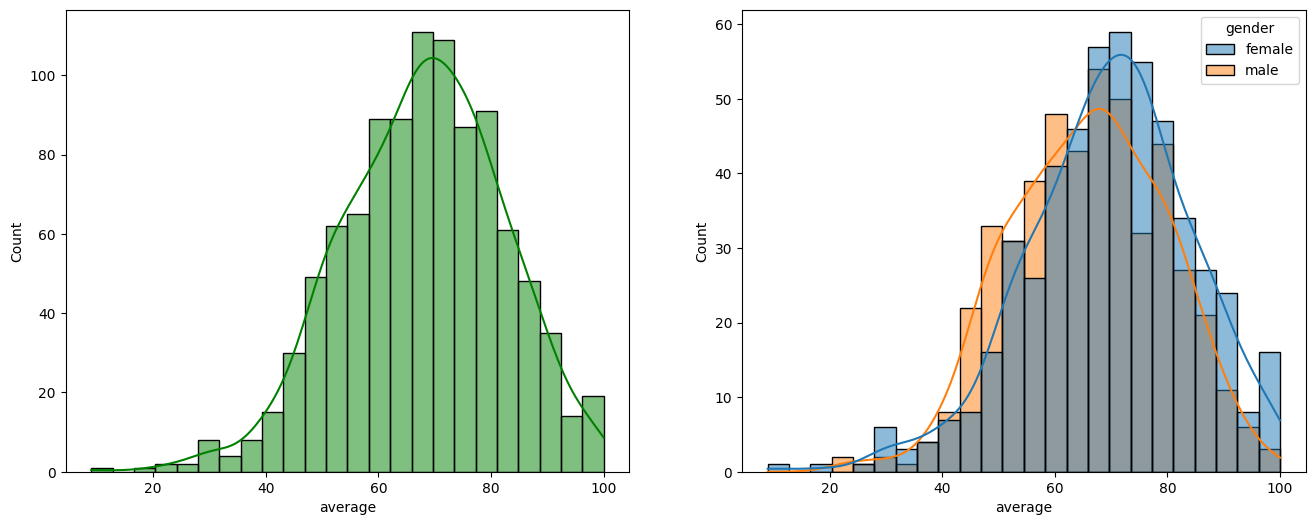

In [15]:
plot_hist('average', 'gender')

##### total score

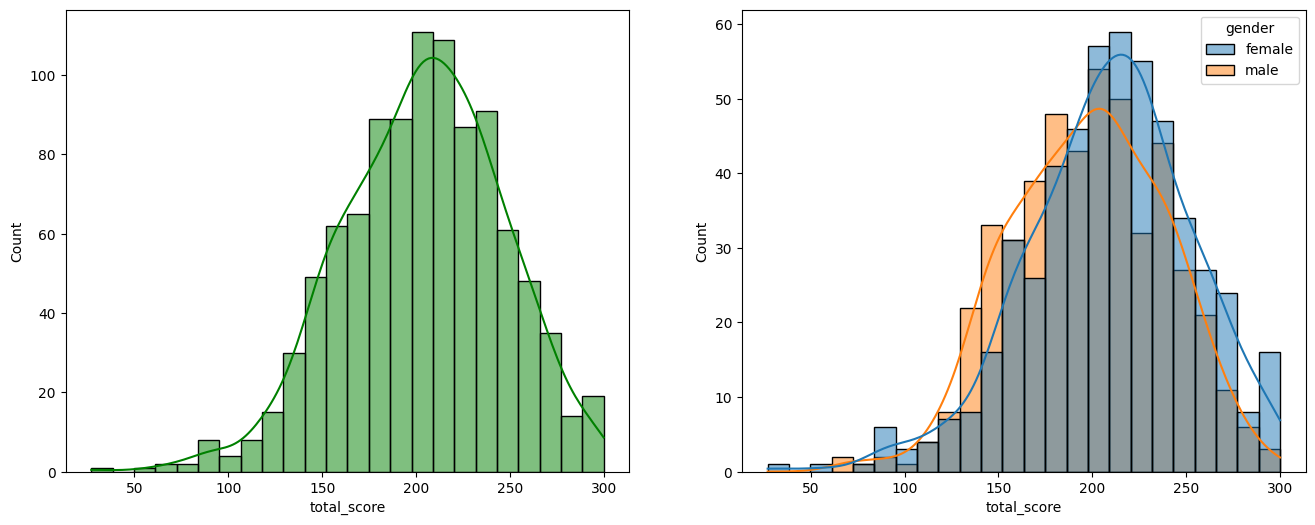

In [16]:
plot_hist('total_score', 'gender')

#####  Insights
- Female students tend to perform well then male students.

##### lunch

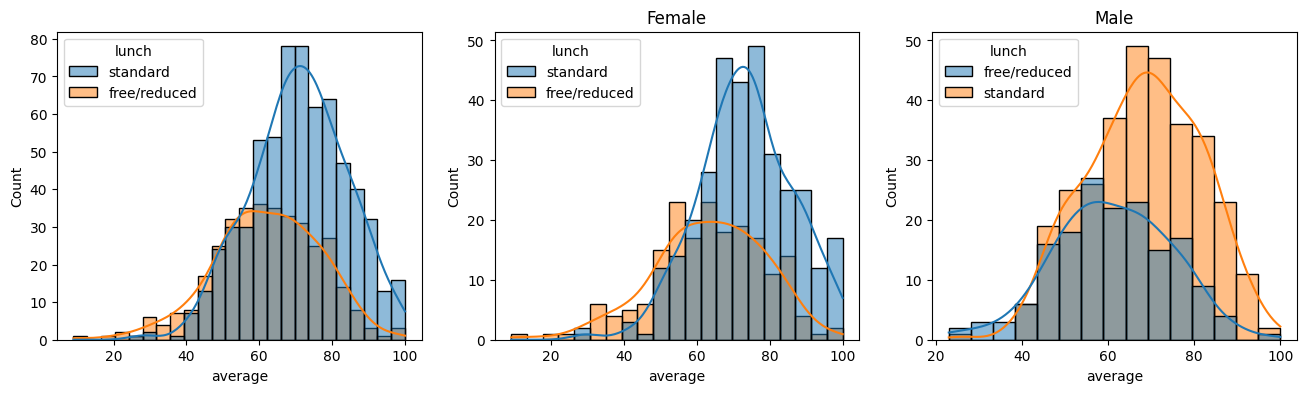

In [17]:
def plot_hist_gender(col,hue):
    fig, axs = plt.subplots(1, 3, figsize=(16, 4))
    plt.subplot(131)
    sns.histplot(data=df,x='average',kde=True,hue=hue)
    plt.subplot(132)
    sns.histplot(data=df[df.gender=='female'], x=col, kde=True, hue=hue).set_title('Female')
    plt.subplot(133)
    sns.histplot(data=df[df.gender=='male'], x=col, kde=True, hue=hue).set_title('Male')
    plt.show();    
plot_hist_gender('average', 'lunch')

#####  Insights
- Standard lunch helps perform well in exams for both male/female.

##### parental level of education

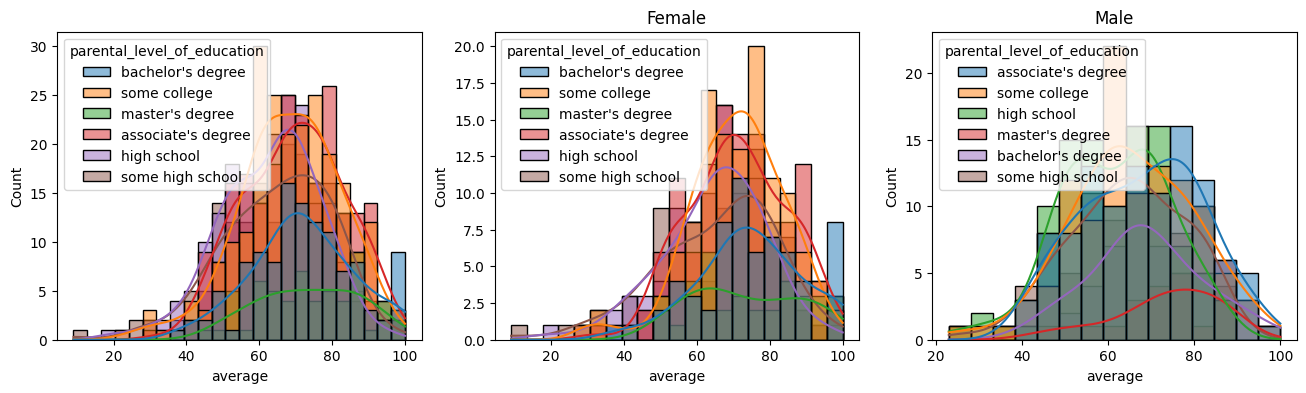

In [18]:
plot_hist_gender('average', 'parental_level_of_education')

#####  Insights
- In general parent's education don't help student perform well in exam.
- Males with parents of associate's degree or master's degree perform well.

##### race/ethnicity

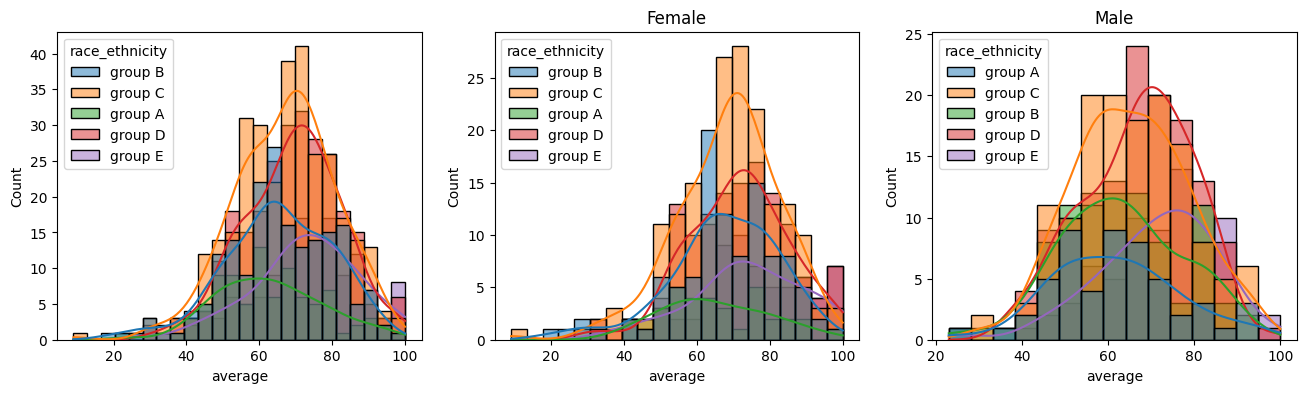

In [19]:
plot_hist_gender('average', 'race_ethnicity')

#####  Insights
- Students of group A and group B tend to perform poorly in exam irrespective of their gender.

#### 2.2 Multivariate analysis using pieplot

In [20]:
df['gender'].value_counts()

gender
female    518
male      482
Name: count, dtype: int64

In [21]:
for i,col in enumerate(cat_features):
    print(col,i)

gender 0
race_ethnicity 1
parental_level_of_education 2
lunch 3
test_preparation_course 4


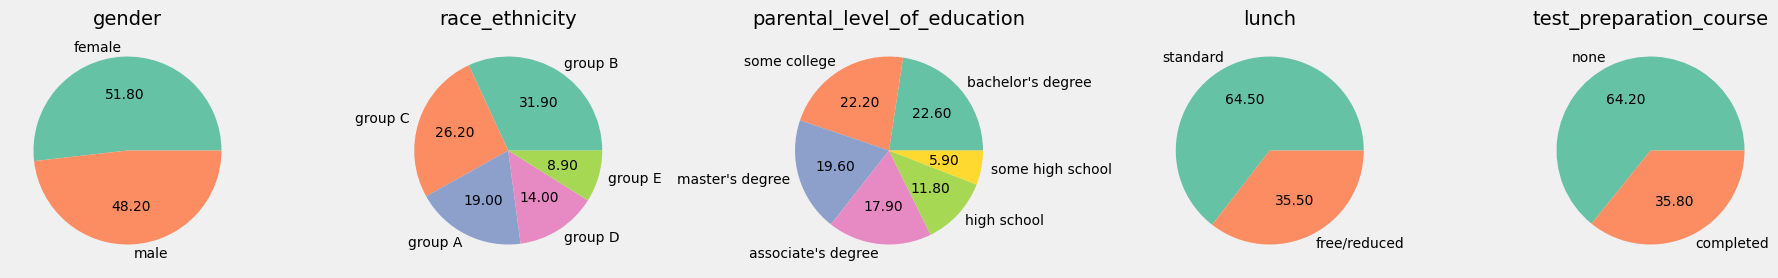

In [69]:
fig, axs = plt.subplots(1, 5, figsize=(18, 6))
def pie_plot(ind, col):
    plt.subplot(1, 5, ind+1)
    size = df[col].value_counts()
    labels = df[col].unique()
    plt.pie(size,  labels = labels, autopct='%.2f',textprops={'fontsize': 10}, colors=sns.color_palette('Set2'))
    plt.title(col, fontsize = 14)
    plt.axis('off')

for ind, col in enumerate(cat_features):
    pie_plot(ind, col)

plt.tight_layout()    


#####  Insights
- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

#### 2.3 Feature Wise Visualization
#### 2.3.1 gender
- How is distribution of Gender ?
- Does gender have any impact on student's performance ?

#### Insights 
- Gender has balanced data with female students are 518 (48%) and male students are 482 (52%) 

In [38]:
scores = num_features + ['total_score', 'average']
gender_group = df.groupby('gender')[scores].mean()
gender_group

,math_score,reading_score,writing_score,total_score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


#### Insights 
- On average females have a better overall score than men.
- Males have scored higher in maths.

#### 2.3.2 race/ethnicity

In [77]:
def count_plot_univar(col):
    plt.figure(figsize=(12,4))
    sns.countplot(data=df, x=col,
                  order = df[col].value_counts().index,
                  palette='viridis');    

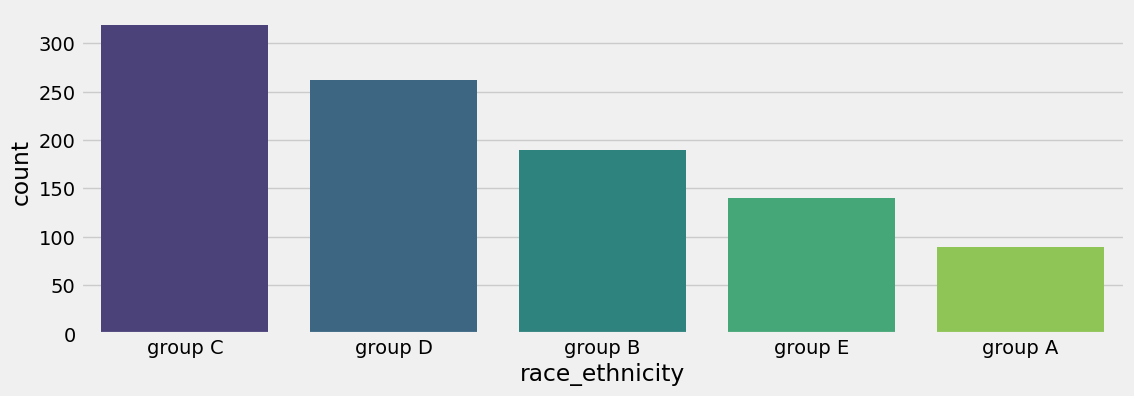

In [79]:
count_plot_univar('race_ethnicity')

#### Insights 
- Most of the student belonging from group C /group D.
- Lowest number of students belong to groupA.

#### 2.3.3 parental level of education

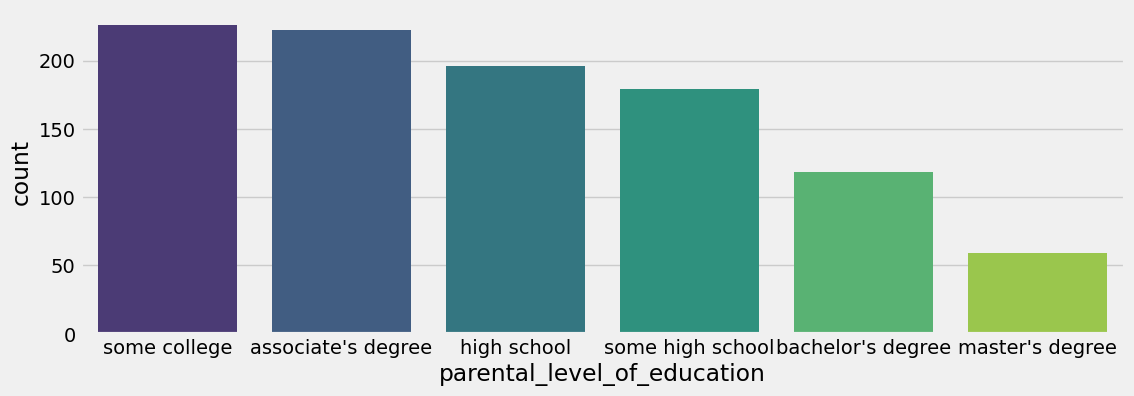

In [80]:
count_plot_univar('parental_level_of_education')

#### Insights 
- Most parents are have some college and the least number of parents have master's degree

#### 2.4.4 lunch

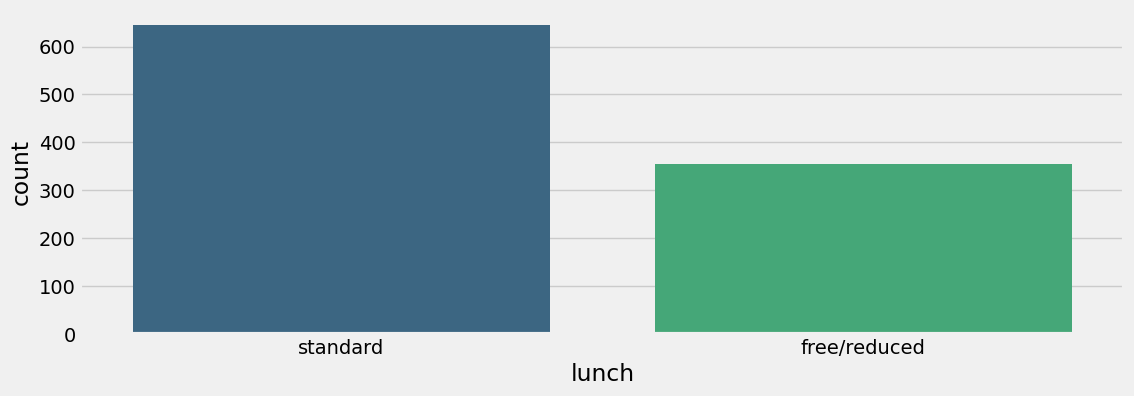

In [81]:
count_plot_univar('lunch')

#### Insights 
- Students with standard lunch are almost twice as many as those with free lunch

#### 2.5.5 test preparation course

#### BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )

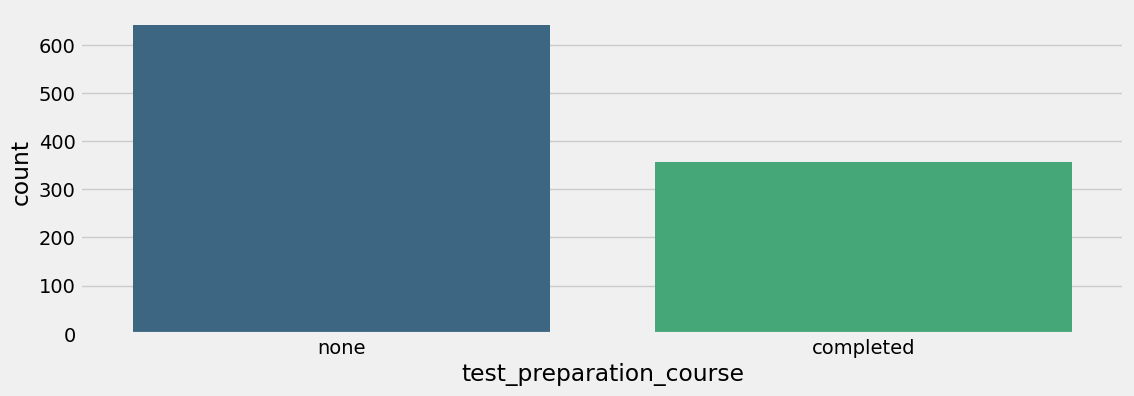

In [84]:
count_plot_univar('test_preparation_course')

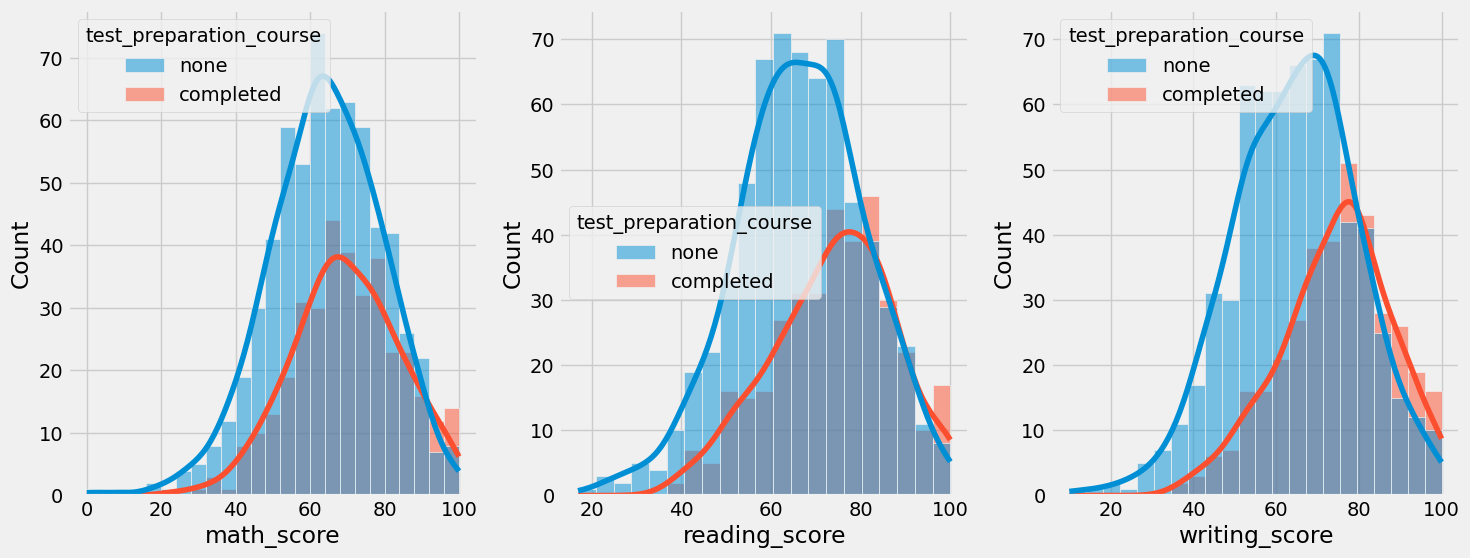

In [120]:
def plot_hist_cols(cols, hue):
    n = len(cols)
    fig, axs = plt.subplots(1, n, figsize=(16, 6))
    ind = 1
    for ind in range(1,n+1):
        plt.subplot(1,n,ind)
        sns.histplot(data=df, x=cols[ind-1], kde=True, hue=hue)
    plt.show();

plot_hist_cols(num_features,'test_preparation_course')    

#### Insights  
- Students who have completed test prepration course, have highers scores in all 3 subjects. Writing and reading are most affected.